# Analyzing Bank Customer Data for Better Term Deposit Campaigns
Getting to Know Our Customers: Insights for Better Campaigns Marketing

<br>By: Tanyaluck Kanai
<br>Project Status: On going
<br>Date: 20 March 2024
<br>Tools: Python, Tableau

## Introduction
Banks often run marketing campaigns to encourage people to open term deposits, which are savings accounts that earn interest.
In this project, we dive into bank's customer data to uncover what drives customers to engage with term deposit products. Our goal is to leverage these insights to refine the company's marketing efforts, customize services, and strengthen customer relationships. By analyzing demographics, financial behaviors, and interaction patterns, we aim to identify actionable strategies that can enhance the bank's offerings and foster growth.

## Methodology 
In this project, we adopt a structured approach to data analysis known as the *Data Analysis Process*. Here's a breakdown of the steps we'll follow:

1. Ask : Defining our goals and the questions we aim to answer with our analysis.
2. Prepare: Gathering our dataset from Kaggle and ensuring it's ready for analysis.
3. Process: Using Python to clean and preprocess our data, making it suitable for detailed examination.
4. Analyze: Delving into the data to uncover patterns, trends, and insights that answer our initial questions.
5. Share: Visualizing our findings with Tableau, crafting a compelling narrative that conveys the story behind the data.
6. Act: Drawing conclusions and recommending actions based on our analysis to inform decision-making and strategy.

## 1. Ask

**Business Objective**

The primary aim of this project is to enhance the effectiveness of the bank's marketing strategy for term deposit campaigns by identifying factors that influence customers' decisions to subscribe to term deposits. Understanding these factors will allow the bank to target the right customers more effectively and allocate resources more efficiently.

**Questions Driving the Analysis**

- Who subscribes?: Who are the customers that subscribe to term deposits (demographics, financial behavior, etc.?
- When do they subscribe?: Is there a pattern in terms of timing or customer lifecycle stage that influences subscription rates?
- How can we increase subscriptions?: Based on the characteristics of current subscribers, how can the bank tailor its marketing campaigns to convert non-subscribers?

## 2. Prepare

### About Dataset
Our project uses a dataset from Kaggle that contains detailed information on bank customers and their responses to term deposit campaigns. It includes demographic details, financial data, and records of interactions with marketing efforts. This dataset is ideal for analyzing customer behavior and improving our banking services.

### Dataset Variables Explanation
- age: Customer's age.
- job: Customer's occupation.
- marital: Customer's marital status.
- education: Customer's level of education.
- default: Whether the customer has credit in default.
- balance: Customer's average yearly balance.
- housing: Whether the customer has a housing loan.
- loan: Whether the customer has a personal loan.
- contact: Type of communication contact with the customer.
- day: Last contact day of the month.
- month: Last contact month of the year.
- duration: Last contact duration in seconds.
- campaign: Number of contacts performed during this campaign for the customer.
- pdays: Number of days since the customer was last contacted from a previous campaign.
- previous: Number of contacts performed before this campaign for the customer.
- poutcome: Outcome of the previous marketing campaign.
- deposit: Whether the customer subscribed to a term deposit.


## 3. Process
Data processing is to find various inaccuracies, errors, inconsistencies in the data and get rid of them so that our primary business problem is not affected.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/mewii/Desktop/Data Course/Bank Target Marketing Project/Bank Target Marketing Dataset.csv')

### 3.1 Dataset Overview

In [2]:
# Size of the DataFrame
rows, columns = df.shape
print(f"Number of columns: {columns}")
print(f"Number of rows: {rows}")

Number of columns: 17
Number of rows: 56373


In [3]:
# Display the first few rows of the DataFrame
print(df.head(3))

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  


In [4]:
# Get a concise summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  object
 2   marital    56373 non-null  object
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.3+ MB
None


In [5]:
# Identify missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


Our Dataset Overview Summary
- Number of columns: 17
- Number of rows: 56373
- Number of numerical columns: 6
- Number of categorical columns: 10
- No missing values

### 3.2 Check for Duplicates

**1. Broad Duplicates Check:** Start by checking for rows where all or nearly all columns are identical, which could indicate a complete duplicate entry.

In [6]:
df.duplicated()
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 11162


**2. Conditional Duplicates Check:** Perform a more detailed check by looking at the combinations of 'age', 'job', 'education', 'contact', 'day', 'month', and 'duration'. By assuming that it's highly unlikely for two different interactions to have the exact same details across these specific columns.

In [7]:
subset_columns = ['age', 'job', 'education', 'contact', 'day', 'month', 'duration']
conditional_duplicates = df.duplicated().sum()

print(f"Number of conditional duplicate rows: {conditional_duplicates}")

Number of conditional duplicate rows: 11162


Both of broad and conditional checks has the same number of duplicates. Therefore, we can eliminate duplicate rows.

In [8]:
# Eliminate duplicate rows

df = df.drop_duplicates(keep='first')
print(f"Size of the dataset after eliminate duplicate rows: {df.shape}")

Size of the dataset after eliminate duplicate rows: (45211, 17)


### 3.3 Identify Outliers in Numerical Data

Outliers are values that are significantly higher or lower than the rest of the data. Finding and dealing with outliers helps make sure our project's conclusions are solid and trustworthy.

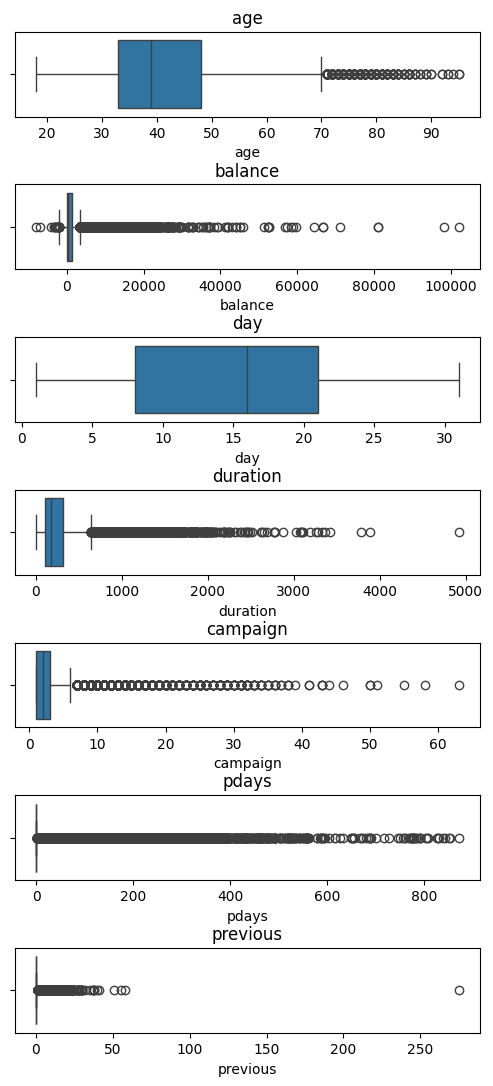

In [9]:
# Identifying outliers by plotting boxplot

cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(6,13))
fig.subplots_adjust(hspace=0.8)
for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

From boxplot we can interpret that:
- Age: There are customers who are over 90 years old. However, age of customers is not considered as an outlier.
- Balance: Several customers have high balances compared to the majority. Still not an outlier.
- Day: Distribution of contact days is even, with no outliers.
- Duration: There is no data point that stand far apart from the rest.
- Campaign: A few customers have been contacted an unusually high number of times. However, these could simply represent higher engagement with certain customers and might be part of an intentional marketing effort?
- Pdays: There is no data point that stand far apart from the rest.
- Previous: Most customers weren't contacted before, but there is one customer who has been contacted many times. We consider it as an outlier.

Eliminate one outlier row in 'previous' column.

In [10]:
# Eliminate the rows with 'previous' > 100
df = df[df['previous'] <= 100 ]

### 3.4 Data Cleaning in Categorical Data

In [11]:
#Identify categorical columns
df.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

Find sub-catergories in catergorical columns and check if there is any inconsistencies or errors in the data.

In [12]:
#Find sub-categories across all categorical columns by using loops
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")

Column: job
Unique values: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Column: marital
Unique values: ['married' 'single' 'divorced']
Column: education
Unique values: ['secondary' 'tertiary' 'primary' 'unknown']
Column: default
Unique values: ['no' 'yes']
Column: housing
Unique values: ['yes' 'no']
Column: loan
Unique values: ['no' 'yes']
Column: contact
Unique values: ['unknown' 'cellular' 'telephone']
Column: month
Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Column: poutcome
Unique values: ['unknown' 'other' 'failure' 'success']
Column: deposit
Unique values: ['yes' 'no']


There is no inconsistencies or errors in the data.

Size of the DataFrame after data cleaning

In [13]:
rows, columns = df.shape
print(f"Number of columns: {columns}")
print(f"Number of rows: {rows}")

Number of columns: 17
Number of rows: 45210
